In [77]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [3]:
df=pd.read_csv('Glass_dataset')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [5]:
df.shape

(214, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


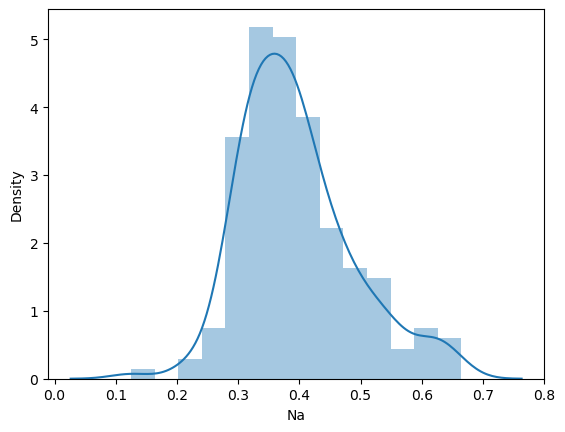

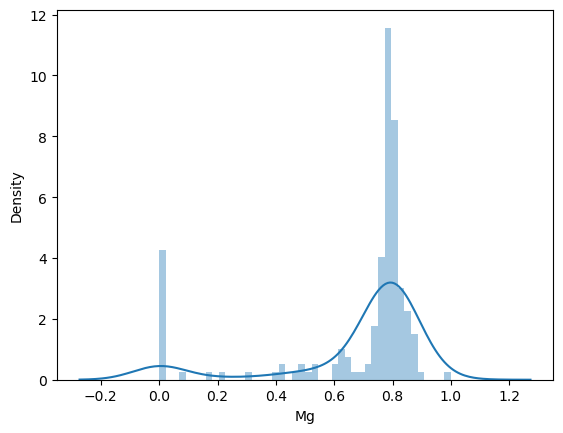

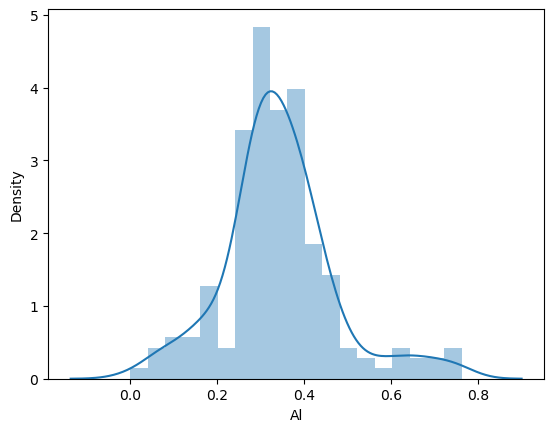

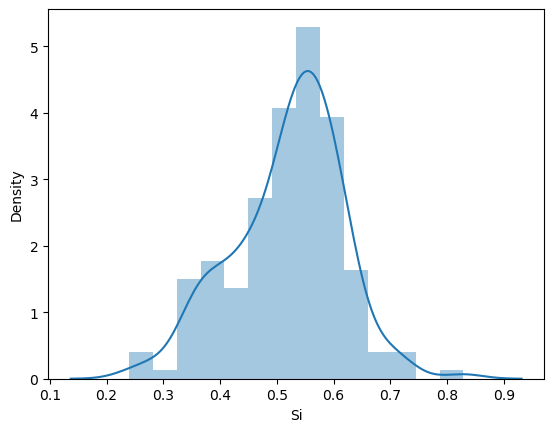

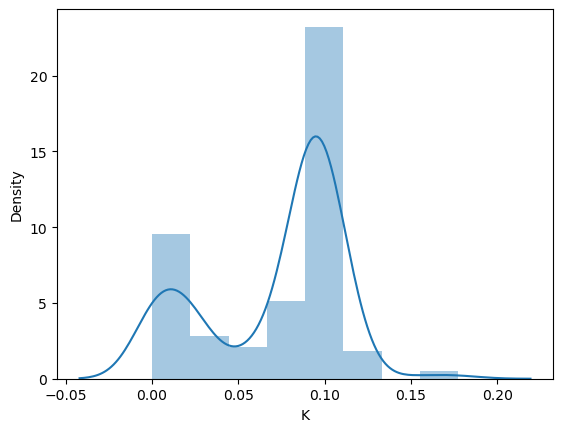

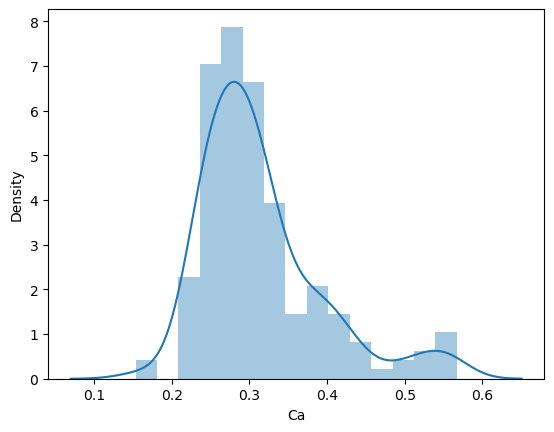

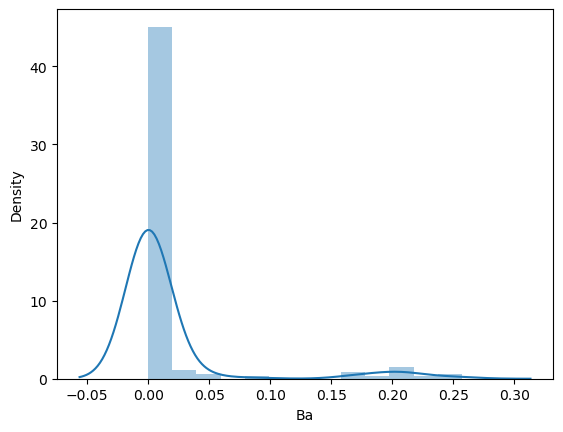

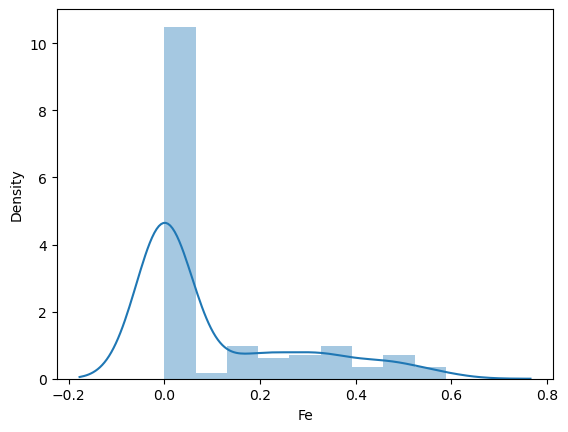

In [119]:
list=['Na','Mg','Al','Si','K','Ca','Ba','Fe']
for i in list:
    sns.distplot(df[i])
    plt.xlabel(i)
    plt.show()

from this data we come to know that there are many negative and positive skews hence the data is not normalised, we need to Normalise the data

#### Normalising the data

In [9]:
def normalise(df):
    result=df.copy()
    for feature_name in df.columns:
        max_value=df[feature_name].max()
        min_value=df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value-min_value)
    return result

In [10]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [18]:
label=df['Type']

In [19]:
del df['Type']

In [20]:
df=normalise(df)

In [21]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.0,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.0,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.0,0.0


In [88]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.000000,0.0,1
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.000000,0.0,1
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.000000,0.0,1
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.000000,0.0,1
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.000000,0.0,1
...,...,...,...,...,...,...,...,...,...,...
199,0.216857,0.643609,0.000000,0.691589,0.578571,0.008052,0.315985,0.168254,0.0,7
200,0.172520,0.664662,0.000000,0.610592,0.658929,0.000000,0.270446,0.200000,0.0,7
202,0.175154,0.619549,0.000000,0.663551,0.698214,0.000000,0.275093,0.177778,0.0,7
204,0.220369,0.634586,0.000000,0.616822,0.623214,0.000000,0.304833,0.212698,0.0,7


<Axes: >

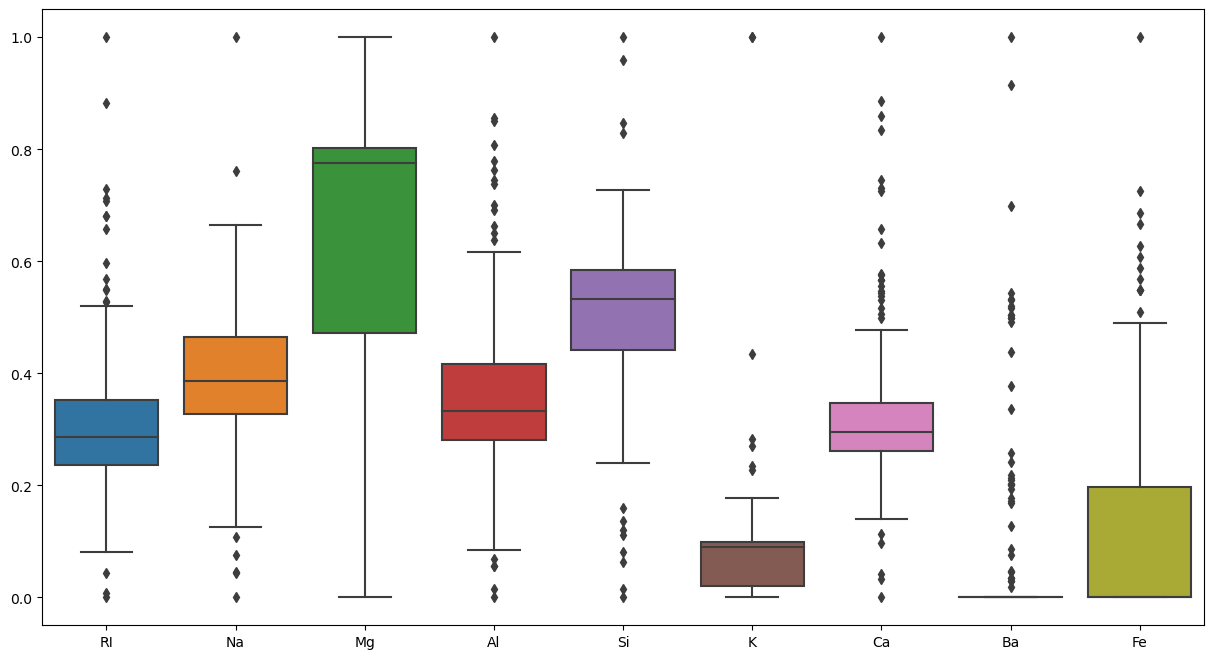

In [23]:
fig=plt.figure(figsize=(15,8))
sns.boxplot(data=df)

the box plot shows many outliers which makes the accuracy of the model down hence we need to remove the outliers by Zscore

In [35]:
df['Type']=label

#### Removing the Outliers

In [36]:
from scipy import stats
df=df[(np.abs(stats.zscore(df))<3).all(axis=1)]

In [37]:
len(df)

175

<Axes: >

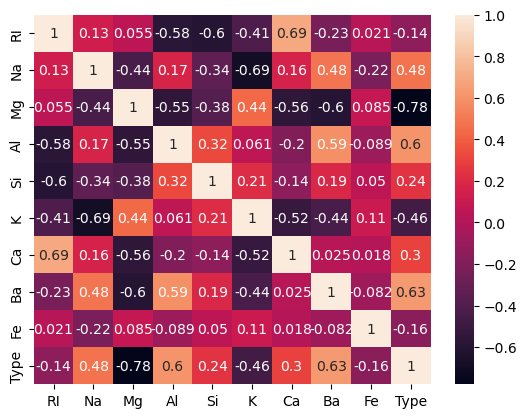

In [38]:
sns.heatmap(df.corr(),annot=True)

#### Spliting The Data into Train and test

In [39]:
y=df['Type']

In [63]:
x=df.drop(columns=['Type'])

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=324)

In [65]:
x_train.shape

(131, 9)

In [66]:
x_test.shape

(44, 9)

In [67]:
y_train.shape

(131,)

In [68]:
y_test.shape

(44,)

### KNeighbors Classifier

In [69]:
knn=KNeighborsClassifier()

In [70]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [85]:
predictknn=knn.predict(x_test)
predictknn

array([1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 7, 1, 1, 1, 2, 1, 1, 1,
       6, 1, 2, 7, 2, 6, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 6, 1, 1, 2],
      dtype=int64)

In [86]:
print(accuracy_score(y_test,predictknn))

0.6363636363636364


In [73]:
print(confusion_matrix(y_test,predictknn))

[[17  3  0  0  0  0]
 [ 6  9  0  0  1  0]
 [ 1  1  0  0  0  0]
 [ 0  2  0  0  1  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  1  2]]


In [74]:
print(classification_report(y_test,predictknn))

              precision    recall  f1-score   support

           1       0.71      0.85      0.77        20
           2       0.60      0.56      0.58        16
           3       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         0
           7       1.00      0.67      0.80         3

    accuracy                           0.64        44
   macro avg       0.38      0.35      0.36        44
weighted avg       0.61      0.64      0.62        44



In [75]:
def predictknn(t):
    t=t.reshape(1,-1)
    pred=knn.predict(t)
    if pred==1:
        print('This glass is used for building_windows_float_processed')
    elif pred==2:
        print('This glass is used for building_windows_non_float_processed')
    elif pred==3:
        print('This glass is used for vehicle_windows_float_processed')
    elif pred==4:
        print('This glass is used for vehicle_windows_non_float_processed')
    elif pred==5:
        print('This glass is used for containers')
    elif pred==6:
        print('This glass is used for tableware')
    else:
        print('This glass is used for Headlamps')
    

In [76]:
t=np.array([0.432836,0.437594,1.0,0.252336,0.351786,0.009662,0.30855,0.0,0.0])
predictknn(t)

This glass is used for building_windows_float_processed


Since The data I have taken is from the 1 st row hence from the data It shows Its of type 1 and the predicted Value is also Type 1

### Random Forest Classifiers

In [78]:
clf=RandomForestClassifier(n_estimators=100)

In [79]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [80]:
predictclf=clf.predict(x_test)
predictclf

array([2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 3, 2, 2, 7, 1, 2, 2, 2, 1, 1, 1,
       6, 1, 2, 7, 2, 7, 2, 1, 1, 2, 1, 1, 2, 1, 5, 1, 2, 2, 5, 1, 2, 2],
      dtype=int64)

In [82]:
print(accuracy_score(y_test,predictclf)*100)

70.45454545454545


In [95]:
print(confusion_matrix(y_test,predictclf))

[[15  5  0  0  0  0]
 [ 3 11  1  0  1  0]
 [ 1  1  0  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  3]]


In [96]:
print(classification_report(y_test,predictclf))

              precision    recall  f1-score   support

           1       0.79      0.75      0.77        20
           2       0.61      0.69      0.65        16
           3       0.00      0.00      0.00         2
           5       1.00      0.67      0.80         3
           6       0.00      0.00      0.00         0
           7       1.00      1.00      1.00         3

    accuracy                           0.70        44
   macro avg       0.57      0.52      0.54        44
weighted avg       0.72      0.70      0.71        44



hence the Accuracy score is coming 70%

In [87]:
def predictRandom(t):
    t=t.reshape(1,-1)
    pred=clf.predict(t)
    if pred==1:
        print('This glass is used for building_windows_float_processed')
    elif pred==2:
        print('This glass is used for building_windows_non_float_processed')
    elif pred==3:
        print('This glass is used for vehicle_windows_float_processed')
    elif pred==4:
        print('This glass is used for vehicle_windows_non_float_processed')
    elif pred==5:
        print('This glass is used for containers')
    elif pred==6:
        print('This glass is used for tableware')
    else:
        print('This glass is used for Headlamps')

In [89]:
t=np.array([0.172520,0.664662,0.000000,0.610592,0.658929,0.000000,0.270446,0.200000,0.0])
predictRandom(t)

This glass is used for Headlamps


### Decission tree Classifier

In [90]:
dtc=DecisionTreeClassifier()

In [91]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [92]:
predictdtc=dtc.predict(x_test)
predictdtc

array([2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 3, 2, 2, 7, 1, 2, 2, 2, 1, 1, 1,
       6, 1, 2, 7, 2, 6, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 5, 2, 2, 1],
      dtype=int64)

In [93]:
print(accuracy_score(y_test,predictdtc))

0.6590909090909091


In [94]:
print(confusion_matrix(y_test,predictdtc))

[[15  5  0  0  0  0]
 [ 3 11  1  0  1  0]
 [ 1  1  0  0  0  0]
 [ 0  2  0  1  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  1  2]]


In [97]:
print(classification_report(y_test,predictdtc))

              precision    recall  f1-score   support

           1       0.79      0.75      0.77        20
           2       0.58      0.69      0.63        16
           3       0.00      0.00      0.00         2
           5       1.00      0.33      0.50         3
           6       0.00      0.00      0.00         0
           7       1.00      0.67      0.80         3

    accuracy                           0.66        44
   macro avg       0.56      0.41      0.45        44
weighted avg       0.71      0.66      0.67        44



so overall the accuracy is coming 66%

### Support Vector Machine

In [99]:
svm=SVC()

In [100]:
svm.fit(x_train,y_train)

SVC()

In [102]:
predictsvm=svm.predict(x_test)
predictsvm

array([2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 7, 1, 2, 2, 2, 1, 1, 1,
       6, 1, 2, 7, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 6, 1, 2, 2, 6, 1, 2, 2],
      dtype=int64)

In [103]:
print(accuracy_score(y_test,predictsvm))

0.5454545454545454


In [104]:
print(confusion_matrix(y_test,predictsvm))

[[11  9  0  0  0  0]
 [ 4 11  0  0  1  0]
 [ 1  1  0  0  0  0]
 [ 0  1  0  0  2  0]
 [ 0  0  0  0  0  0]
 [ 0  1  0  0  0  2]]


In [105]:
print(classification_report(y_test,predictsvm))

              precision    recall  f1-score   support

           1       0.69      0.55      0.61        20
           2       0.48      0.69      0.56        16
           3       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         0
           7       1.00      0.67      0.80         3

    accuracy                           0.55        44
   macro avg       0.36      0.32      0.33        44
weighted avg       0.55      0.55      0.54        44



Hence the accuracy score is 55% 

In [113]:
data=[{'Model Name':'KNeighborsClassifier','Accuracy_score':'0.6363636363636364'},{'Model Name':'RandomForestClassifier','Accuracy_score':'0.7045454545454546'},{'Model Name':'DecissionTreeClassifier','Accuracy_score':'0.6590909090909091'},{'Model Name':'SupportVectorMachine','Accuracy_score':'0.5454545454545454'}]

In [114]:
accuracy=pd.DataFrame(data)
accuracy

,Model Name,Accuracy_score
0,KNeighborsClassifier,0.6363636363636364
1,RandomForestClassifier,0.7045454545454546
2,DecissionTreeClassifier,0.6590909090909091
3,SupportVectorMachine,0.5454545454545454


## Form the Above table Random Forest Classifiers have more accuracy

#### Predict The Values for Which type of Glass is that

In [115]:
def predictRandom(t):
    t=t.reshape(1,-1)
    pred=clf.predict(t)
    if pred==1:
        print('This glass is used for building_windows_float_processed')
    elif pred==2:
        print('This glass is used for building_windows_non_float_processed')
    elif pred==3:
        print('This glass is used for vehicle_windows_float_processed')
    elif pred==4:
        print('This glass is used for vehicle_windows_non_float_processed')
    elif pred==5:
        print('This glass is used for containers')
    elif pred==6:
        print('This glass is used for tableware')
    else:
        print('This glass is used for Headlamps')

In [116]:
t=np.array([0.172520,0.664662,0.000000,0.610592,0.658929,0.000000,0.270446,0.200000,0.0])
predictRandom(t)

This glass is used for Headlamps
